# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
print("1)")
a = torch.rand(3, 4, dtype=torch.float)
b = torch.rand(12,dtype=torch.float)
print(a)
print(b)
print("2)")
b = b.reshape(2, 2, 3)
print(b)
print("3)")
a = a[:, 0]
print(a)

1)
tensor([[0.2460, 0.5537, 0.5769, 0.1408],
        [0.0881, 0.4001, 0.3345, 0.0488],
        [0.7771, 0.6751, 0.8262, 0.7719]])
tensor([0.6559, 0.8135, 0.5260, 0.1398, 0.2912, 0.2893, 0.1333, 0.6849, 0.9271,
        0.1875, 0.5074, 0.8865])
2)
tensor([[[0.6559, 0.8135, 0.5260],
         [0.1398, 0.2912, 0.2893]],

        [[0.1333, 0.6849, 0.9271],
         [0.1875, 0.5074, 0.8865]]])
3)
tensor([0.2460, 0.0881, 0.7771])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
print("1)")
a = torch.rand(5, 2, dtype=float)
b = torch.rand(1, 10, dtype=float)
print(a)
print(b)
print("2)")
c = b.reshape(5, 2)
print(c)
print("3)")
print(a.add(c))
print(a.mul(c))
print(a.sub(c))
print(a.div(c))

1)
tensor([[0.2674, 0.1585],
        [0.0696, 0.2581],
        [0.0590, 0.2093],
        [0.3579, 0.3020],
        [0.6706, 0.6491]], dtype=torch.float64)
tensor([[0.5258, 0.2544, 0.1465, 0.6743, 0.8643, 0.5172, 0.0296, 0.7848, 0.1861,
         0.7288]], dtype=torch.float64)
2)
tensor([[0.5258, 0.2544],
        [0.1465, 0.6743],
        [0.8643, 0.5172],
        [0.0296, 0.7848],
        [0.1861, 0.7288]], dtype=torch.float64)
3)
tensor([[0.7932, 0.4129],
        [0.2161, 0.9324],
        [0.9233, 0.7265],
        [0.3874, 1.0867],
        [0.8567, 1.3778]], dtype=torch.float64)
tensor([[0.1406, 0.0403],
        [0.0102, 0.1740],
        [0.0510, 0.1083],
        [0.0106, 0.2370],
        [0.1248, 0.4730]], dtype=torch.float64)
tensor([[-0.2583, -0.0959],
        [-0.0769, -0.4162],
        [-0.8053, -0.3078],
        [ 0.3283, -0.4828],
        [ 0.4845, -0.0797]], dtype=torch.float64)
tensor([[ 0.5086,  0.6232],
        [ 0.4751,  0.3828],
        [ 0.0682,  0.4047],
        [12.1077

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

1)
torch.Size([100, 200, 200, 3])


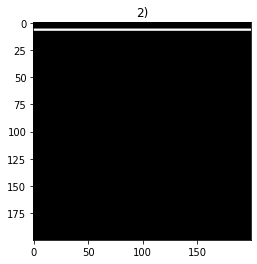

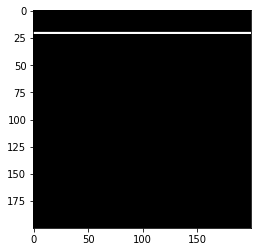

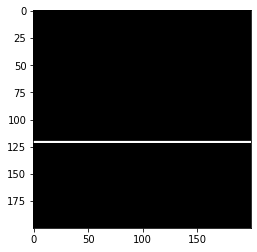

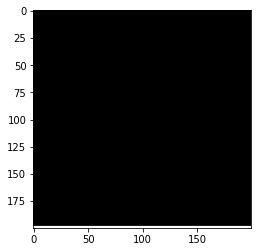

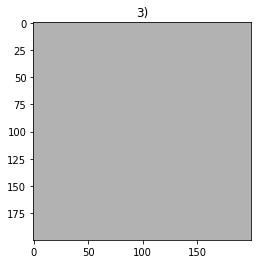

In [ ]:
import numpy as np

images = torch.IntTensor(100, 200, 200, 3).zero_()
for i in range(0, 100):
  images[i][i * 2 : i * 2 + 2] = 255
print("1)")
print(images.shape)
fig, ax = plt.subplots()
ax.set_title('2)')
ax.imshow(images[3])
fig, ax = plt.subplots()
ax.imshow(images[10])
fig, ax = plt.subplots()
ax.imshow(images[60])
fig, ax = plt.subplots()
ax.imshow(images[99])
fig, ax = plt.subplots()
ax.set_title('3)')
ax.imshow((images.float().mean(0) * 70).int())
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.empty(2, 3, 4).uniform_()
b = torch.empty(1, 8, 3).uniform_()

c = b.reshape(2, 3, 4)

c = c.cpu()
a = a.cpu()

a = torch.autograd.Variable(torch.FloatTensor(a), requires_grad=False)
c = torch.autograd.Variable(torch.FloatTensor(c), requires_grad=True)

L = torch.mean((c - a)**2)
d = torch.autograd.grad(outputs=L, inputs=c)
print(d)

(tensor([[[ 0.0598,  0.0318, -0.0112,  0.0197],
         [-0.0536, -0.0200, -0.0487, -0.0441],
         [ 0.0179,  0.0058, -0.0215, -0.0583]],

        [[-0.0193,  0.0367,  0.0552,  0.0280],
         [-0.0130, -0.0390, -0.0121,  0.0097],
         [ 0.0200,  0.0343, -0.0389, -0.0186]]]),)
